---

# CSCI 3202, Fall 2022
# Homework 8
# Due: Friday November 18, 2022 at 6:00 PM

<br> 

### Your name: Adrian Ornelas Ruvalcaba

<br> 

---

Some useful packages and libraries:



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
from collections import deque
import heapq
import unittest
from scipy import stats
import copy as cp
from time import time
import sys

# generate random integer values
from numpy.random import seed
from numpy.random import randint

---

## Problem 1: Maximizing an Objective Function with a Genetic Algorithm 

Suppose we've lost the index card with our favorite cupcake recipe. We know the ingredients of the cake, but cannot remember the exact amount of each ingredient. We decide to use a genetic algorithm to generate the  ingredient amounts. With each iteration of the genetic algorithm, we bake the cupcakes and taste-test them. We achieve our goal and stop running the genetic algorithm when we get to the actual recipe: 

* 1 tsp salt 
* 3 tsp baking powder 
* 2 cups all-purpose flour 
* 1 cup butter 
* 1 cup granulated sugar 
* 4 large eggs
* 1 tsp vanilla extract
* 1 cup buttermilk 

In [2]:
target = [1, 3, 2, 1, 1, 4, 1, 1]

An example starting state for a member of our population might look like: $state = [1, 2, 100, 36, 60, 3, 5, 50]$, which is equivalent to 1 tsp salt, 2 tsp baking powder, 100 cups of flour, 36 cups of butter, 60 cups of granulated sugar, 3 large eggs, 5 tsp vanilla, and 50 cups of buttermilk.

### (1a) 

Write an objective function `def recipe_success(state)` that takes a single argument state, and returns the objective function value (fitness) of the state. The objective function should be maximized when a state reaches the target. You could for example define the fitness score of a particular state based on how far away each entry is from the target recipe.

In [3]:
def recipe_success(state):
    # Your code here.
    fitness = []

    for i in range(len(state)):
        if state[i] == target[i]:
            # if not add the value plus 1 to avoid the divide 0 issue
            fitness.append(state[i]+1)
        else:
            # we use 1 to avoid dividing by 0
            fitness.append(1)

    return fitness


In [4]:
# Write your own test case to make sure that the target element achieves
# the fitness score you would expect it to (this will vary depending on
# what you did here.)

# test case
state = [1,2,100, 36, 4, 4, 5, 50]
correct_state_test = [1, 3, 2, 1, 1, 4, 1, 1]

# apply function 
fit_val = recipe_success(state)
cor_val = recipe_success(correct_state_test)
# print results of both 
print("Fitness value of wrong case is:", fit_val)
print("Fitness value of correct answer is:", cor_val)
print("-----------------------------------------------------------------")
# generate random state test
random_gen_state = randint(0,10,8)
print("This is the random state to test:", random_gen_state)
print("The desired was is target:", target, "\n")

print("This is the recipe success of randomly generated states:", sum(recipe_success(random_gen_state)), "\n")
print("This is the recipe success of target:", sum(recipe_success(target)))

Fitness value of wrong case is: [2, 1, 1, 1, 1, 5, 1, 1]
Fitness value of correct answer is: [2, 4, 3, 2, 2, 5, 2, 2]
-----------------------------------------------------------------
This is the random state to test: [4 9 8 5 4 8 3 2]
The desired was is target: [1, 3, 2, 1, 1, 4, 1, 1] 

This is the recipe success of randomly generated states: 8 

This is the recipe success of target: 22


### (1b) 

Write a genetic algorithm that starts with a population of 100 randomly generated "recipes/states/members" and uses the objective function you wrote in **(1a)** to hopefully hit the target after a certain number of generations. 

Key components of your code:
- Generate the initial population randomly from integers between 0 and 100 
- Allow for mutations in your population with an overall probability of mutation set to p = 0.2
- Choose 2 "parents" in the generation of each "child"
- Choose a random split point at which to combine the two "parents"
- Run the algorithm for 50 iterations ("generations"). Do you hit your target?

In [5]:
# define prob class. 
# referenced from class notbooks and AIMI class repo
class problem:
    # initalize perameritiers 
    # OJ: objection to like
    # mp: probulation of mutation happening
    # fs: whats the objective goal we want to hit (stop premiturly to not go though luch large computation heavy task)
    def __init__(self, initial_population, objective_function, mutation_probability, fitness_goal):
        '''
        initial_population = list of lists; each sub-list is a dna string for a population member
        objective_function = objective function to maximize
        mutation_probability = probability that any given child has a mutation
        fitness_goal = fitness goal to achieve (stopping criterion, once member reaches this)
        '''
        self.population = initial_population
        self.initial_population = initial_population
        self.objective_function = objective_function
        self.p_mutate = mutation_probability
        self.n_pop = len(initial_population) 
        self.n_dna = len(initial_population) 
        self.fitness_goal = fitness_goal

    # (1) Selection: fitness is our selection step of our taks
    def fitness(self):
        '''
        calculate each population member's probability of being selected for
        reproduction based on performance on objective function
        '''
        # append performance score
        performance = self.objective_function(self.population)
        total = sum(performance)
        p_reproduce = [perf/total for perf in performance]

        return p_reproduce
        
    # (2) Crossover: 
    def reproduce(self, parent1, parent2):
        # last DNA snippet from parent1:
        # select one random integer 
        split = np.random.randint(low=1, high=self.n_dna)
        child = np.concatenate([parent1[:split], parent2[split:]])

        return child

    # (3) Mutation: 
    def mutate(self, child):
        # which gene to mutate?
        gene = np.random.randint(low=0, high=self.n_dna)
        value = randint(0, 100)
        child[gene] = value

        return child
        
    
# Follows generational flow. n_iteration is the upper limitation of run time. Problem is like our inital population 
def genetic_algorithm(problem, n_iter):
    
    for t in range(n_iter):
        
        new_generation = []
        
        # new generation should contain the same number of population as original population. 
        for k in range(problem.n_pop):
            
            # select for reproduction
            p_reproduce = problem.fitness() 

            # get 2 parents
            ind_parents1 = np.random.choice(range(0,problem.n_pop), size=8, p=p_reproduce, replace=False) # perform a bias random choice to select two parents by bias p_reproduction. producing two unique parents by using replace=flase. replace=true allows repeats 
            ind_parents2 = np.random.choice(range(0,problem.n_pop), size=8, p=p_reproduce, replace=False) # perform a bias random choice to select two parents by bias p_reproduction. producing two unique parents by using replace=flase. replace=true allows repeats 
            child = problem.reproduce(ind_parents1, ind_parents2) 
            
            # mutate: take the new child and perform a random mutation to occur 
            l_mutate = np.random.choice([True, False], p=[problem.p_mutate, 1-problem.p_mutate])
            if l_mutate: # if i decide to mutate, than pass that mutated child. If not then dont mutate child but still pass along 
                child = problem.mutate(child)
            
            new_generation.append(child[k])
        
        # set problem.population = new generation
        problem.population = new_generation
        performance = problem.objective_function(problem.population)
            
        best_member = (sum(performance), problem.population)
        #print("this is the best memeber:", best_member)

        if best_member[0] >= problem.fitness_goal:
            return True, best_member
        # else produce new children 
        
    # if we never meet our fitness goal
    return False, best_member

In [6]:
# target = [1, 3, 2, 1, 1, 4, 1, 1]
# targ+1 = [2, 4, 3, 2, 2, 5, 2, 2] <- this is my actual goal because of the 1 for not equal states

# generate random sample
list_sample = []

# Create List of list
print("This is the random generated sample:")
for i in range(8):
    temp = randint(0, 100)
    list_sample.append(temp)
print(list_sample, "\n")


genetic_problem = problem(initial_population=list_sample, 
                          fitness_goal=22,  # (14+8)is our target
                          mutation_probability=0.2, # 20% to allow for mutations 
                          objective_function=recipe_success)
                          
result, status_of_recipe = genetic_algorithm(genetic_problem, 50)

print(result, status_of_recipe)


This is the random generated sample:
[22, 84, 98, 80, 98, 12, 69, 55] 

False (11, [0, 3, 7, 7, 3, 6, 2, 2])


### (1c)

In a couple of paragraphs, report the following:
- How many generations did it take to hit the goal?
- If you change the initial population size to 200, does that change the number of generations it takes to achieve the goal recipe?
- If you change the probability of mutation, does that affect the number of generations it takes to achieve the goal recipe? How so?

Alternate questions to answer if Target not hit:
- Report whether you minimized or maximized the objective function and whether that led to any major changes in how you designed the probability of reproduction. A couple sentences here is fine.
 
- Report how many ingredients you ended up matching. e.g. target = [0.5, 3, 2.5, 1, 1.5, 4, 1, 1.25], perhaps your algorithm achieved [1.5, 3, 8, 1, 1, 100, 56, 1, 1.25], then you would have matched 4 of the ingredient values.
 
- Report how many iterations you tried in order to get this answer. (Don't burn up your machine in the process)

In [7]:
# try to succeed 
# generate random sample
list_sample = []

# Create List of list
print("This is the random generated sample:")
for i in range(8):
    temp = randint(0, 30)
    list_sample.append(temp)
print(list_sample, "\n")


genetic_problem = problem(initial_population=list_sample, 
                          fitness_goal=22,  # (14+8) ingrediant amount
                          mutation_probability=0.2, # 20% to allow for mutations 
                          objective_function=recipe_success)
                          
result, status_of_recipe = genetic_algorithm(genetic_problem, 1234)

print(result, status_of_recipe)


This is the random generated sample:
[23, 1, 24, 11, 24, 23, 17, 0] 

False (9, [4, 7, 3, 4, 6, 5, 3, 1])


`The target recipe was not hit. I have increased my number of iteration to over 1000 and still did not get any true recipe matches. I believe its due to the fact that we are always choosing a random numbers to add to our current state. This leads to not going to any goal and to actully reach any instance of this would have to reprogram the code inorder to reach a specific goal.`

---

## Problem 2:  Calibrating a model for global mean sea level changes

<img src="http://www.anthropocenemagazine.org/wp-content/uploads/2017/05/future-sea-levels.jpg" width="250">

**Part A:** Load and plot some data.

Let's load a couple of data sets.  `data_sealevel.csv` is a data set of global mean sea levels, and the other, `data_temperature.csv` is a data set of global mean temperatures. The following bullets discuss the quantities of interest. 
* `sealevel` will be a list of global mean sea levels (millimeters). This data is found in a column which resides within the `data_sealevel.csv`
* `sealevel_sigma` will be a list of the *uncertainty* in global mean sea levels (millimeters). Use the column labeled `uncertainty` within the `data_sealevel.csv` file to obtain this data, and
* `temperature` will be a list of global mean temperatures (degrees Celsius). This data is in the `temperature` column in the `data_temperature.csv` file


In [8]:
# Here is the suggested code to load in the data files. Feel free to modify these as you wish, but that
# is not necessary.

year = []
sealevel = []
sealevel_sigma = []
temperature = []

dfSealevel = pd.read_csv("data_sealevel.csv")
dfTemperature = pd.read_csv("data_temperature.csv")

# We aren't doing any heavy-duty stats stuff, so let's just keep what we need as regular lists
year = dfSealevel["year"].tolist()
sealevel = dfSealevel["sealevel"].tolist()
sealevel_sigma = dfSealevel["uncertainty"].tolist()
temperature = dfTemperature["temperature"].tolist()

**Part A (i):**

- Make three plots for Global mean surface temperature, Sea level (mm), and Sea Level Uncertainty (mm). The x-axis for each of these plots will be the years over which this data was collected. 

- Plot the data points as a scatter plots, and plot the three plots side-by-side-by-side (one row, three columns of figures). The point here is learn how to customize your figures a bit more, and also because computer screens are (typically) wider than they are tall.

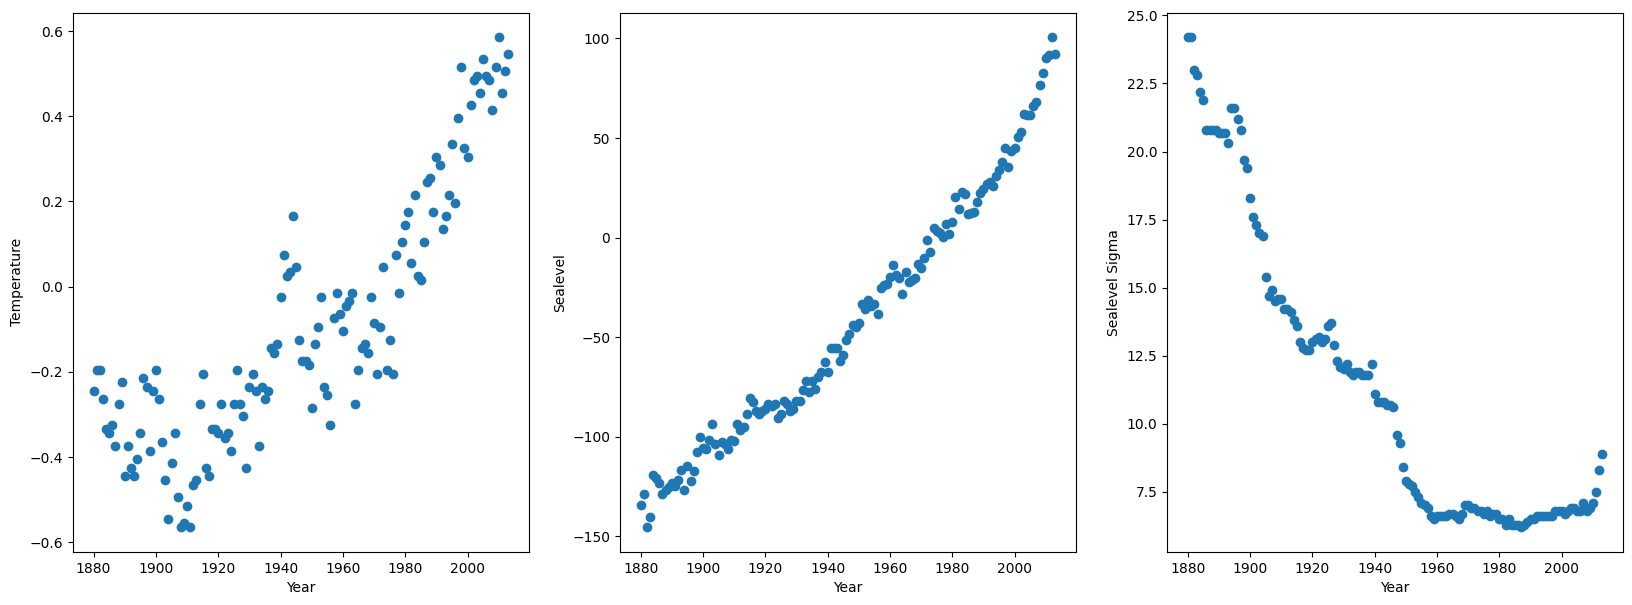

In [9]:
# Your plotting code here.
# 3 graphs 1 row displaying temperature, sealevel, and sealevel sigma 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 7))
ax[0].scatter(x = year, y = temperature)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Temperature")

ax[1].scatter(x = year, y = sealevel)
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Sealevel")

ax[2].scatter(x = year, y = sealevel_sigma)
ax[2].set_xlabel("Year")
ax[2].set_ylabel("Sealevel Sigma")

plt.show()

**Part A (ii):** How does the uncertainty in global mean sea levels change as a function of time?  When is the uncertainty the highest?  Give one reason why you think this might be the case.

`The uncertainty in global mean seal levels changes in a decreasing state. The highest uncertainty was reported about 1880. I believe this is because of the increase in population that causued more need for water in our planet.`

---

**Part B:**  The "out-of-box" sea-level model

In your plot from **(a)**, you should see quite an apparent relationship between increasing temperatures and rising sea levels.  Seems like someone should try to model the relationship between those two, huh?

In the helper function, slr, below, a simple model for temperature-driven changes in global mean sea level (GMSL) is defined. This is the model of [Rahmstorf (2007)](http://science.sciencemag.org/content/315/5810/368).

The `slr` model takes two parameters, $\alpha$ and $T_{eq}$, and requires a time series of global mean temperatures: `slr(alpha, Teq, temperature)`.
* `alpha` is the sensitivity of sea-level changes to changes in global temperature. The units for $\alpha$ are millimeters of sea-level changes per year, or mm y$^{-1}$.
* `Teq` is the equilibrium global mean temperature, with units of degrees Celsius.
* `temperature` is the time series of global mean surface temperatures, assumed to be relative to the 1961-1990 mean.

For now, you do not need to worry too much about how this model works.  It is very simple, and widely used, but the point here is that you can plug in a particular set of temperatures (the model **forcing**) and parameters ($\alpha$ and $T_{eq}$), and out pops a time series of simulated global mean sea levels.

**Our goal:**  pick good values for $\alpha$ and $T_{eq}$, so that when we run the `slr` model using the observations of temperature (which we plotted above), the model output matches well the observations of global mean sea level (which we also plotted above).

The whole process of figuring out what these good parameter values are is called **model calibration**, and it's awesome.  Model Calibration is the point of this problem. Let's have a look at why we need to do this in the first place, shall we?

The default parameter choices given in the Rahmstorf (2007) paper are $\alpha=3.4$ mm y$^{-1}$ and $T_{eq} = -0.5\ ^{\circ}$C.

**Your task for Part B:**

Make a plot that contains:
* the observed sea level data as scatter points
* the modeled sea levels as a line, using the temperature observations from above as the `temperature` input
* an appropriate legend and axis labels
* $x$ axis is years
* $y$ axis is sea level

Note that after you run the `slr` model, you will need to **normalize** the output relative to the 1961-1990 reference period.  That is because you are going to compare it against data that is also normalized against this reference period. The `years` that correspond to the model output should be the same as the `years` that correspond to the `temperature` input. Normalizing data can mean several things. Follow the steps outlined below to "normalize" the data in the way needed for this problem:
- Compute the mean of the output of the slr model for the years from 1961-1990 (inclusive).
- Subtract this value from each entry in the "sealevel" list (list returned by the slr function)


Make sure that you normalize the data prior to plotting.

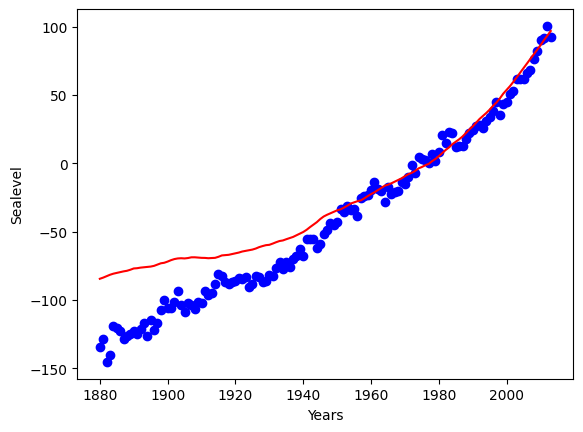

In [10]:
# helpers: Provided by homework

def slr(alpha, Teq, temperature):
    '''sea-level emulator of Rahmstorf 2007 (DOI: 10.1126/science.1135456)
    Takes global mean temperature as forcing, and parameters:
    alpha = temperature sensitivity of sea level rise, and
    Teq   = equilibrium temperature,
    and calculates a rise/fall in sea levels, based on whether the temperature
    is warmer/cooler than the equilibrium temperature Teq.
    Here, we are only worrying about alpha (for now!)'''

    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

# Your code here.
# Creat list to store nomalized data
normalized_slr_sealevel = []
normalized_sealevel = []

# observed temperatures using given alpha and Teq
alpha_prime = float(3.4) # had to make floats because for some reason slr wasnt liking non floats.
teq_prime = float(-0.5)
observed_slr_sealevel = slr(alpha_prime, teq_prime, temperature)

# get the mean of observed data after using slr between the years of 1961-1990 and normalize it
mean_observed_sealevel = np.mean(observed_slr_sealevel[year.index(1961): year.index(1991)]) # learned it was .index from looking at log function bellow
for slr in observed_slr_sealevel:
    normalized_slr_sealevel.append(slr - mean_observed_sealevel)

# do the same thing with the orignal observed sealevel to plot against 
mean_sealevel = np.mean(sealevel[year.index(1961): year.index(1991)])
for level in sealevel:
    normalized_sealevel.append(level - mean_sealevel)

# make scatter polt:
# original normalized sealevel and plot as scatter
plt.scatter(year, normalized_sealevel, color = "Blue", label = "Original Normalized Sealevel")
# draw a line through it using the normalized slr sealevel
plt.plot(year, normalized_slr_sealevel, color = "Red", label = "SLR normalized Sealevel")
# appropriate labels
plt.ylabel("Sealevel")
plt.xlabel("Years")
plt.show()

Your plot above ought to show decent match for the late 1900s, but diverge a bit further back in time.

**The point:**  We can do better than this "out-of-the-box" version of the Rahmstorf sea level model.

**Part C:**   Figuring out our objective function

As our **objective function**, we will use the joint likelihood function of the observed sea level data, given the model simulation.  The following is a detailed description of the derivation of the objective function for a hill climbing routine. **Note, you do not need to do anything for this part other than to read about the objective function and execute the cell below, then move to part D.**

For a single data point in year $i$, $y_i$, with associated uncertainty $\sigma_i$, we can assume the likelihood for our model simulation in year $i$, $\eta_i$, follows a normal distribution centered at the data point.  The model simulation is a **deterministic** result of our parameter choices $\alpha$ and $T_{eq}$, so we write the likelihood as:

$$L(y_i \mid \alpha, T_{eq}) = \dfrac{1}{\sqrt{2 \pi} \sigma_i} e^{-\dfrac{(\eta_i(\alpha, T_{eq}) - y_i)^2}{2\sigma_i^2}}$$

But that only uses a single data point.  Let's use all the data!  The **joint likelihood** is the product of all of the likelihoods associated with the individual data points. But that is the product of a lot of numbers that are less than 1, so it will be **tiny**.  Instead, we should try to optimize the **joint log-likelihood**, which is simply the (natural) logarithm of the joint likelihood function.

If we assume the observational data ($y_i$) are all independent, then the joint log-likelihood is:

$$l(\mathbf{y} \mid \alpha, T_{eq}) = -\dfrac{N}{2} \log{(2\pi)} - \sum_{i=1}^N \log{(\sigma_i)} - \dfrac{1}{2}\sum_{i=1}^N \left( \dfrac{\eta_i(\alpha, T_{eq}) - y_i}{\sigma_i} \right)^2$$

where, $\mathbf{y} = [y_1, y_2, \ldots, y_N]$ is the entire vector (list) of sea level observations, $\eta(\alpha, T_{eq}) = [\eta_1(\alpha, T_{eq}), \eta_2(\alpha, T_{eq}), \ldots, \eta_N(\alpha, T_{eq})]$ is the entire vector (list) of `slr` model output when the parameter values $\alpha$ and $T_{eq}$ are used, and $N$ is the number of observations we have.

**Defining our objective function**

Now define a `log_likelihood(parameters, obs_mu, obs_sigma)` function:
* `parameters`: argument that is a list of two parameter values, $[\alpha, T_{eq}]$
  * within the likelihood function, you will need to generate the model simulation $\eta(\alpha, T_{eq})$ using the input `parameters`, for comparison against the observational data
* `obs_temp`: argument that is a time series (list) of observed global mean temperatures, that will be used to run the `slr` model. Provide a default value of `temperature` for this, because we only have one temperature data set to use, and we don't want to keep 
* `obs_mu`: argument that is a time series (list) of observed values, that will be used for comparison against the `model` output. Provide a default value of `sealevel` here, because we won't be changing the observational data.
* `obs_sigma`: argument that is a time series (list) of the corresponding uncertainties in the observational data. Simiarly, provide a default value of `sealevel_sigma` here, so we can avoid the tedious task of sending the data set into this function.
* all three of these inputs should be lists, and should be the same length
* this routine should return a **single** float number, that is the joint log-likelihood of the given `model` simulation.

In [11]:
# Here is the objective function. You will be using this function below when you code up hill-climbing and 
# simulated annealing routines.

def log_likelihood(parameters, obs_temp=temperature, obs_mu=sealevel, obs_sigma=sealevel_sigma):
    model = slr(parameters[0], parameters[1], obs_temp)
    
    # normalize
    reference = (year.index(1961), year.index(1990))
    model -= np.mean(model[reference[0]:(reference[1]+1)])

    return np.sum([np.log(stats.norm.pdf(x=model, loc=obs_mu, scale=obs_sigma))])

**Part D:**  Defining our class structure

Now we will apply a hill-climbing algorithm to tune the $\alpha$ and $T_{eq}$ parameters.

Using our in-class lecture notebook on hill-climbing as a guide, do the following:

* Define a `State` class, with attributes for the parameter values (which define the state) and the objective function value of that state.
* Define a `Problem_hillclimb` **sub-class** of the more general class `Problem`, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * methods for `moves` (return the list of all possible moves from the current state) and `best_move` (return the move that maximizes the objective function).
  * the `moves` available should be in proper 2-dimensional space.  Do **not** simply optimize one parameter, keeping the other fixed, then optimize the other parameter, while keeping the first fixed.  (*That method *can* work, but there are some theoretical issues that would need to be tackled, and we are not getting into that here.*) You are allowed to restrict yourself to movements along a grid, as long as you entertain steps in both the $\alpha$ and the $T_{eq}$ directions.
* Define the `hill_climb` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `hill_climb(problem, n_iter)`:  arguments are a `Problem_hillclimb` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

In [12]:
# Your code here.

# refrenced from hill_clibing inclass notbook, Simulated_Annealing inclass notbook, and Search.py from AIMI canvas class reppo 
class state:
    
    # attributes for state
    def __init__(self, values, objective_fucntion_value):
        self.value = values # defines state 
        self.obj_func_val = objective_fucntion_value # objective function value fo state 

# refrenced from hill_clibing inclass notbook, Simulated_Annealing inclass notbook, and Search.py from AIMI canvas class reppo 
class problem:
    
    # attributes for problem
    def __init__(self, initial, objective_function, stepsize):
        self.current_state = initial # a state object
        self.objective_function = objective_function # log_likelihood function
        self.stepsize = stepsize # stepsize has alpha as index 0 and teq as index 1
    
    # all possible moves in 2 dimension space. Because its a two dimention space, there is 2 extra moves we must account for
    # comepaired to the notbook but as well make it into a touple of moves to keep x and y axis in tack which is alpha and teq (stored in stepsize[alpha, teq])
    def moves(self):
        '''return all possible moves to make from the current_state'''
        all_moves = []
        # could move right...
        # each left or right must have a tuple because of the 2 dimensional space 
        # alpha and teq positive 
        all_moves.append((self.current_state.value[0] + self.stepsize[0], self.current_state.value[1] + self.stepsize[1]))
        # alpha positive, teq negative
        all_moves.append((self.current_state.value[0] + self.stepsize[0], self.current_state.value[1] - self.stepsize[1]))
        # ... or left!
        # alpha negative teq positive
        all_moves.append((self.current_state.value[0] - self.stepsize[0], self.current_state.value[1] + self.stepsize[1]))
        # alpha and teq negative negative
        all_moves.append((self.current_state.value[0] - self.stepsize[0], self.current_state.value[1] - self.stepsize[1]))

        return all_moves

# refrenced from hill_clibing inclass notbook, Simulated_Annealing inclass notbook, and Search.py from AIMI canvas class reppo 
def hill_climb(problem, n_iter):
    
    # iterate until we can't do any better
    for k in range(n_iter):
        # get the best move 
        next_move = problem.best_move()
        # calculate its objective function value 
        next_move_obj = problem.objective_function(next_move)
        # now check if that move is more efficiant than our current objective function value 
        if next_move_obj < problem.current_state.obj_func_val:
            # return the best state 
            return problem.current_state
        # if not then keep going untill number of iteration has been hit 
        problem.current_state.value, problem.current_state.obj_func_val = next_move, next_move_obj
    # if we hit all iteration and didnt come up with a new best value, return false 
    print('reached n_iter')
    return False

# refrenced from hill_clibing inclass notbook, Simulated_Annealing inclass notbook, and Search.py from AIMI canvas class reppo 
class problem_hillclimb(problem):
    
    def best_move(self):
        '''return the best move possible from the current_state'''
        # what moves are possible?
        all_moves = self.moves()
        # what is objective function for each of them?
        # obj_func = [self.objective_function(move) for move in all_moves] <- from hil_clibing. this is used to show how i broke it down to a 2 dimension representation
        # first grab the current stored states 
        curr_alpha = self.current_state.value[0]
        curr_teq = self.current_state.value[1]
        # get objective value of the current alpha and teq using our move set to use in first compair
        new_alpha_obj_val = self.objective_function([all_moves[0][0], self.current_state.value[1]])
        new_teq_obj_val = self.objective_function([self.current_state.value[0], all_moves[0][1]])
        # will use to store the current largest alpha and teq
        max_alpha = 0
        max_teq = 0

        for alpha_p, teq_p in all_moves:
            # check alpha
            # check if our current objective value of alpha is not the current max
            if new_alpha_obj_val <= self.objective_function([alpha_p, curr_teq]):
                # updat the current alpha objective value to the new largest one found
                new_alpha_obj_val = self.objective_function([alpha_p, curr_teq])
                # store the value of alpha
                max_alpha = alpha_p
            # check teq
            # check if our current objective value of teq is not the current max
            if new_teq_obj_val <= self.objective_function([curr_alpha, teq_p]):
                # updat the current teq objective value to the new largest one found
                new_teq_obj_val = self.objective_function([curr_alpha, teq_p])
                # store the value of teq
                max_teq = teq_p
        # best = all_moves[max(zip(obj_func, range(len(obj_func))))[1]] <- from hill climbing. this isnt need here due to the fact we store the best alpha and teq 
        return max_alpha, max_teq


Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a hill-climbing problem object, using this initial state, the log-likelihood objective function, and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
3. ***hill-climb!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**
* As a benchmark, make sure that your log-likelihood is *at least* -500.
* Your calibrated (optimized) model simulation should be going straight through the data points.
* If this isn't the case, remember to normalize your model against the 1961-1990 reference period!

Paramter values: alpha =  3.4 teq =  -0.5 and corresponding log-likelihood value -576.2160507179199 

out of box hill climbing values: alpha and teq =  (3.0500000000000007, -0.6430000000000001)


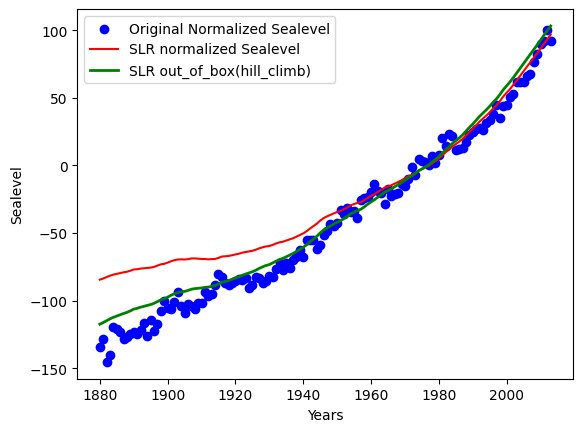

In [13]:
# I had to copy slr function again to where i will use it because for some reason
# on my local computer it doesnt like it calculating float numbers again with out redifining it 
def slr(alpha, Teq, temperature):
    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

# Your code here.
# create inital State 
alpha_teq = [3.4, -0.5] # using original values given earlier 
stepsizeP = [0.07, 0.013] # kept trying to find a good value, I am happy with this. 
initial_stateP = state(alpha_teq, log_likelihood(alpha_teq))
# create the problem using hillclimbing class
prob_P = problem_hillclimb(initial_stateP, log_likelihood, stepsizeP)
# print paramter values and corresponding log-likelihood value
print("Paramter values: alpha = ", prob_P.current_state.value[0], "teq = ", prob_P.current_state.value[1] ,"and corresponding log-likelihood value", prob_P.current_state.obj_func_val, "\n")

# out-of-box model 
out_of_box = hill_climb(prob_P, n_iter=1150)
# print out_of_box alpha and teq values compaired to the hill_climbing calculated values 
print("out of box hill climbing values: alpha and teq = ", out_of_box.value)

# To get ready to plot:
# test our now found alpha and teq from out_of_box to our original temperature cvs
out_of_box_slr = slr(out_of_box.value[0], out_of_box.value[1], temperature)
# get the mean of the slr out_of _box teperatures
mean_out_of_box_slr = np.mean(out_of_box_slr[year.index(1961): year.index(1991)])

#normalize the slr out_of_box values
normalized_slr_out_of_box = []
for curr_slr in out_of_box_slr:
    normalized_slr_out_of_box.append(curr_slr - mean_out_of_box_slr)

# the normalized sealevel as scatter plot
plt.scatter(year, normalized_sealevel, color = "Blue", label = "Original Normalized Sealevel")
# plot the line from last graph of normalized sea level 
plt.plot(year, normalized_slr_sealevel, color = "Red", label = "SLR normalized Sealevel")
# compare line from last graph of normalized slr value to our new slr out_of_box values
plt.plot(year, normalized_slr_out_of_box, color = "Green", label='SLR out_of_box(hill_climb)', linewidth=2.0)

plt.xlabel('Years')
plt.ylabel('Sealevel')
plt.legend()
plt.show()

**Part E:**  Simulated annealing

Let's re-calibrate the `slr` model. This time, we will use **simulated annealing**. Again, using our in-class activity as a guide, do the following:

* Continue to use your `State` class above.
* Define a `Problem_annealing` sub-class of the `Problem` class, with:
  * attributes for the current `State` (a `State` object), the `objective_function` (the log-likelihood defined above), and `stepsize`. You will need to play around to decide what an appropriate stepsize is. Keep in mind that you may need a different stepsize for each of $\alpha$ and $T_{eq}$.
  * method for `random_move`, to pick a random move **by drawing from a multivariate normal distribution**.  You should use the `stepsize` attribute as the covariance (width) for this.
* Define the `simulated_annealing` algorithm, with any necessary modifications (here, and in the above classes) for the new 2-dimensional state space.
  * `simulated_annealing(problem, n_iter)`:  arguments are a `Problem_annealing` object and number of iterations, `n_iter`
  * return a `State` that corresponds to the algorithm's guess at a global maximum

Subject to the above constraints, you may implement these however you would like.

In [14]:
# I had to copy slr function again to where i will use it because for some reason
# on my local computer it doesnt like it calculating float numbers again with out redifining it 
def slr(alpha, Teq, temperature):
    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

# Your code here. 
# simulated annealing from class notbook Simulated anneling notebook solution.ipynb
class Problem_annealing(problem):
    # gets atributes from the problem class

    # random move function
    def random_move(self):
        curr_state = self.current_state.value
        convariance_alpha = self.stepsize[0] # get alpha
        convariance_teq = self.stepsize[1] # get teq|
        # create into 2d squre to use multivariate normal
        cov_2d_squre = [[convariance_alpha, 0],[0, convariance_teq]]
        # use multivariate_normal to get the random move
        ran_move = np.random.multivariate_normal(curr_state, cov_2d_squre, 1).T
        # throws an error with ran_move being returned because it formes a tupple but i need list back
        tuple_to_list = [ran_move[0][0], ran_move[1][0]]

        return tuple_to_list # return the random move 
    
    # from inclass notebook simulated_annealing_Notebook.ipynb
    # nothing needs to be modified, included it in the problem annealing class to make it easier to access 
    def schedule(self, time):
        '''some sort of mapping from time to temperature, to represent how we should be 
        "cooling off" - that is, accepting wacky solutions with lower and lower probability'''
        C = 20 #
        p = 0.7 #
        # just tempeature function
        temperature = C/(time+1)**p
        
        return temperature

# from inclass notebook simulated_annealing_Notebook.ipynb
# problem and number of iterations tollerable
def simulated_annealing(problem_p, n_iter):
    # no need for current state from notebook

    # so taking a step through every possible iterations 
    for t in range(n_iter):
        # get temp output 
        temperature = problem_p.schedule(t)
        # make random move (left or right)
        nextMove = problem_p.random_move()
        nextValue = problem_p.objective_function(nextMove)
        # delta evaluation that if the move performed would put it in a worse or better situation 
        delta_obj = problem_p.objective_function(nextMove) - problem_p.current_state.obj_func_val
        
        # this is the update, if we take the move 
        if delta_obj > 0:
            problem_p.current_state.value = nextMove
            problem_p.current_state.obj_func_val = nextValue
        # else its a bad move -> making posiition worse 
        else:
            # generate our probability to accept move
            p_accept = np.exp(delta_obj/temperature)
            # a randome choice of to accept the move, if we accept then we update, else we just iterate/move to next step 
            accept = np.random.choice([True,False],p=[p_accept,1-p_accept])
            
            if accept:
                problem_p.current_state.value = nextMove
                problem_p.current_state.obj_func_val = nextValue
                
    return problem_p.current_state

Now:
1. define an initial state object, using the default values from Rahmstorf 2007 as a starting point.
2. define a simulated annealing problem object, using this initial state, the log-likelihood objective function, an appropriate temperature updating schedule and stepsize(s) of your choosing. (The stepsize(s) may require some playing around to find something you are happy with.)
  * note that this "temperature" is distinct from the actual physical temperature used as input to drive the `slr` model
3. ***anneal!!!*** Use a number of iterations that you deem appropriate. 

Play around until you have a simulation that you are happy with.  Then:
1. Print to screen the parameter values and corresponding log-likelihood value.
2. Compare this calibrated log-likelihood value to the "out-of-box" model (above).
3. Make a plot of:
  * the sea level observations as scatter points
  * the uncalibrated model as one line
  * the calibrated model as another line
  * include axis labels and a legend
  
**"Unit tests":**  How does your model look when you plot it against the data? If it doesn't look good, then you failed this unit test :(

out of box hill climbing values: alpha and teq =  (3.0500000000000007, -0.6430000000000001)


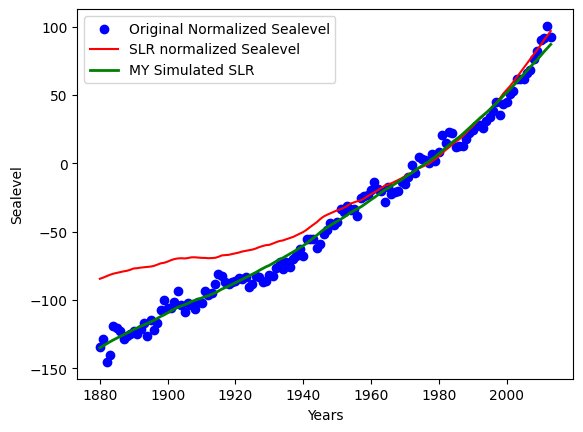

In [15]:
# I had to copy slr function again to where i will use it because for some reason
# on my local computer it doesnt like it calculating float numbers again with out redifining it 
def slr(alpha, Teq, temperature):
    n_time = len(temperature)
    deltat = 1
    sealevel = [0]*n_time
    sealevel[0] = -134
    for t in range(n_time-1):
        sealevel[t+1] = sealevel[t] + deltat*alpha*(temperature[t]-Teq)

    return sealevel

# Your code here.
# create inital State 
default_alpha_teq = [3.4, -0.5] # using original values given earlier 
my_stepsizeP = [0.07, 0.013] # kept trying to find a good value, I am happy with this. 
initial_stateP = state(default_alpha_teq, log_likelihood(default_alpha_teq))
# create the problem using hillclimbing class
sim_my_prob = Problem_annealing(initial_stateP, log_likelihood, my_stepsizeP)
# out-of-box model 
my_out_of_box = simulated_annealing(sim_my_prob, 1000)
# print out_of_box alpha and teq values compaired to the hill_climbing calculated values 
print("out of box hill climbing values: alpha and teq = ", out_of_box.value)

# Time to plot my simulation:
# now run my simulation through the slr function. grabing alpha and teq 
my_slr_out_of_box = slr(my_out_of_box.value[0], my_out_of_box.value[1], temperature)
# get the mean of my slr out_of _box teperatures to use for nomalizing
my_mean_out_of_box_slr = np.mean(my_slr_out_of_box[year.index(1961): year.index(1991)])

# normalize my slr out of box data to plot
my_normalized_slr_out_of_box = []
for curr_slr in my_slr_out_of_box:
    my_normalized_slr_out_of_box.append(curr_slr - my_mean_out_of_box_slr)

# the normalized sealevel as scatter plot
plt.scatter(year, normalized_sealevel, color = "Blue", label = "Original Normalized Sealevel")
# plot the line from last graph of normalized sea level 
plt.plot(year, normalized_slr_sealevel, color = "Red", label = "SLR normalized Sealevel")
# compare line to my simulated guesses 
plt.plot(year, my_normalized_slr_out_of_box, color = "Green", label='MY Simulated SLR', linewidth=2.0)
# titles and plot
plt.xlabel('Years')
plt.ylabel('Sealevel')
plt.legend()
plt.show()


**Part F:**

Briefly summarize your findings. Specifically discuss the $\alpha$ and $T_{eq}$ parameter values you found in **Part D** and **Part E**. How do these compare to the parameters of the model given by Rahmstorf? Did your hill-climbing and/or your simulated annealing programs find a better fit than the Rahmstorf model? 

`I have notied that when my found step size veriable or alpha/teq have not addepted to the random simulateed generated function has affected the simulated aneliing function different because `